In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris

In [2]:
X,y = load_iris(return_X_y = True)

In [3]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [4]:
gmm = GaussianMixture(n_components = 3, init_params = 'kmeans', covariance_type = 'full', )

In [5]:
gmm.fit(X)

GaussianMixture(n_components=3)

In [9]:
gmm.means_

array([[5.9170732 , 2.77804839, 4.20540364, 1.29848217],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.54639415, 2.94946365, 5.48364578, 1.98726565]])

In [55]:
gmm.covariances_[1][:2,:2]

array([[0.121765, 0.097232],
       [0.097232, 0.140817]])

In [70]:
c = np.random.randn(3,3)
c

array([[-0.21643836, -0.44627907, -0.40878364],
       [-1.18588998,  0.42754211, -1.0761055 ],
       [ 1.4653039 ,  0.51846278,  1.30279995]])

In [73]:
# c = np.diag(c)
# c
c = np.eye(c)

TypeError: only integer scalar arrays can be converted to a scalar index

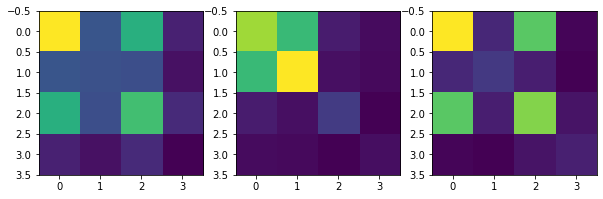

In [34]:
fig,ax = plt.subplots(ncols = 3, nrows = 1, figsize = (10,7))

ax[0].imshow(gmm.covariances_[0])
ax[1].imshow(gmm.covariances_[1])
ax[2].imshow(gmm.covariances_[2])
plt.xticks()
plt.show()

In [15]:
gmm.precisions_

array([[[ 10.14275566,  -4.47443487,  -9.22764153,   6.37514372],
        [ -4.47443487,  31.02318411,   0.98855283, -35.55669159],
        [ -9.22764153,   0.98855283,  20.54483439, -24.88837106],
        [  6.37514372, -35.55669159, -24.88837106, 114.89887997]],

       [[ 19.32946088, -12.65754535,  -4.59185187,  -4.873089  ],
        [-12.65754535,  15.88788775,   1.13359394,  -2.14681312],
        [ -4.59185187,   1.13359394,  39.56563246, -18.29837222],
        [ -4.873089  ,  -2.14681312, -18.29837222, 108.19803695]],

       [[  9.86127199,  -2.57914524,  -9.01249795,   2.34892532],
        [ -2.57914524,  15.19775497,   0.37050911,  -8.45225454],
        [ -9.01249795,   0.37050911,  12.30380089,  -4.32962099],
        [  2.34892532,  -8.45225454,  -4.32962099,  19.36736812]]])

In [38]:
gmm.precisions_cholesky_

array([[[ 1.90513485, -1.44789764, -2.0157097 ,  0.59474676],
        [ 0.        ,  4.12863165, -1.72458255, -3.31713729],
        [ 0.        ,  0.        ,  3.89278015, -2.32187361],
        [ 0.        ,  0.        ,  0.        , 10.71908951]],

       [[ 2.86575305, -3.176974  , -0.89681626, -0.46848388],
        [ 0.        ,  3.97856918,  0.1275891 , -0.20638805],
        [ 0.        ,  0.        ,  6.03912454, -1.75914957],
        [ 0.        ,  0.        ,  0.        , 10.40182854]],

       [[ 1.60656112, -0.80043213, -2.52084468,  0.53374511],
        [ 0.        ,  3.3623648 , -0.45116276, -1.9206015 ],
        [ 0.        ,  0.        ,  3.36688341, -0.98381758],
        [ 0.        ,  0.        ,  0.        ,  4.40083721]]])

In [40]:
gmm.converged_

True

In [41]:
gmm.n_iter_

17

In [42]:
gmm.lower_bound_

-1.2014746139064725

In [45]:
# bayesian information criterion ; the lower the better
gmm.bic(X_train)

496.3679935842245

In [46]:
# akaike infirmation criterion ; the lower the better
gmm.aic(X_train)

373.7183569018145

In [ ]:
gmm.score_